In [719]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [720]:
data=pd.read_csv('/content/Wine_clust  (1).csv')
wine=data.copy()
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [721]:
wine.shape

(178, 13)

In [722]:
print(wine.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

In [723]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [724]:
wine['Magnesium']=wine['Magnesium'].astype(float)
wine['Proline']=wine['Proline'].astype(float)

**Checking for Outliers**

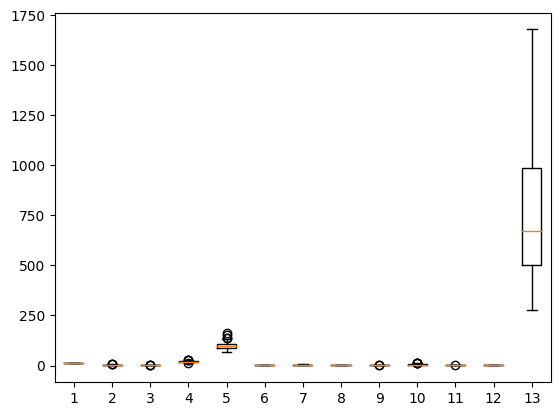

In [725]:
graphs = wine.select_dtypes(include=['float'])
plt.boxplot(graphs)
plt.show()

**Handling Outliers using IQR method**

In [726]:
Q1 = np.percentile(wine['Malic_Acid'],25,method='midpoint')
Q3 = np.percentile(wine['Malic_Acid'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
wine['Malic_Acid'] = wine['Malic_Acid'].clip(lower=low_lim,upper=up_lim)


In [727]:
Q1 = np.percentile(wine['Ash'],25,method='midpoint')
Q3 = np.percentile(wine['Ash'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
wine['Ash'] = wine['Ash'].clip(lower=low_lim,upper=up_lim)

In [728]:
Q1 = np.percentile(wine['Ash_Alcanity'],25,method='midpoint')
Q3 = np.percentile(wine['Ash_Alcanity'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
wine['Ash_Alcanity'] = wine['Ash_Alcanity'].clip(lower=low_lim,upper=up_lim)

In [729]:
Q1 = np.percentile(wine['Magnesium'],25,method='midpoint')
Q3 = np.percentile(wine['Magnesium'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
wine['Magnesium'] = wine['Magnesium'].clip(lower=low_lim,upper=up_lim)

In [730]:
Q1 = np.percentile(wine['Proanthocyanins'],25,method='midpoint')
Q3 = np.percentile(wine['Proanthocyanins'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
wine['Proanthocyanins'] = wine['Proanthocyanins'].clip(lower=low_lim,upper=up_lim)

In [731]:
Q1 = np.percentile(wine['Color_Intensity'],25,method='midpoint')
Q3 = np.percentile(wine['Color_Intensity'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
wine['Color_Intensity'] = wine['Color_Intensity'].clip(lower=low_lim,upper=up_lim)

In [732]:
Q1 = np.percentile(wine['Hue'],25,method='midpoint')
Q3 = np.percentile(wine['Hue'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
wine['Hue'] = wine['Hue'].clip(lower=low_lim,upper=up_lim)

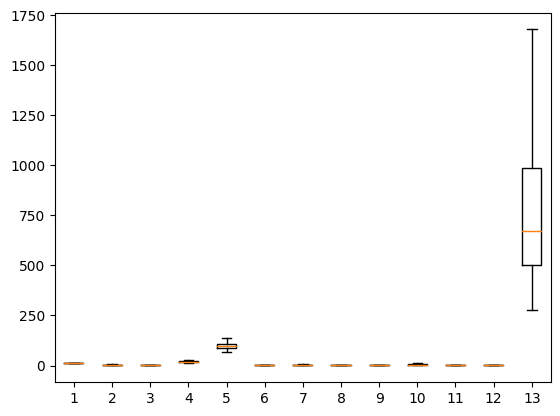

In [733]:
graphs = wine.select_dtypes(include=['float'])
plt.boxplot(graphs)
plt.show()

**Scaling of data**

In [734]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features =scaler.fit(wine)
features =features.transform(wine)

Scaled_wine1=pd.DataFrame(features,columns=wine.columns)
Scaled_wine1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565916,0.241050,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.267203,0.366803,1.847920,1.013009
1,0.246290,-0.501984,-0.862788,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291882,0.410974,1.113449,0.965242
2,0.196879,0.027733,1.154572,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284952,0.322632,0.788587,1.395148
3,1.691550,-0.346722,0.507494,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225636,-0.428270,1.184071,2.334574
4,0.295700,0.237793,1.915839,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318505,0.366803,0.449601,-0.037874


**Checking for correlation**

<Axes: >

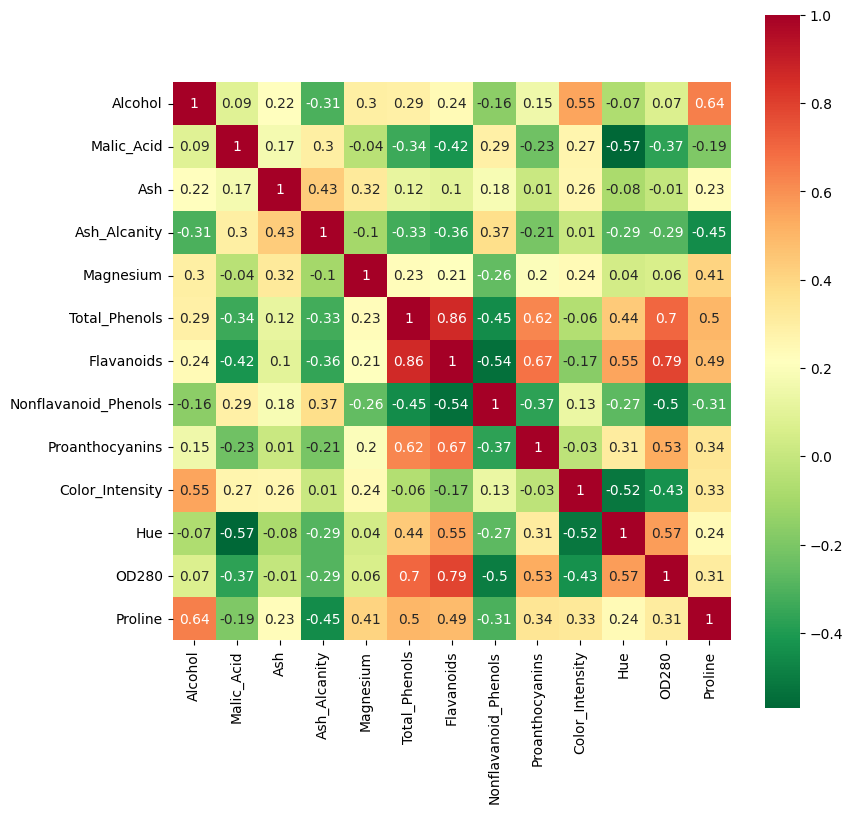

In [735]:
plt.subplots(figsize = (9,9))
sns.heatmap(Scaled_wine1.corr().round(2),annot = True,vmax = 1,square = True,cmap = 'RdYlGn_r')

In [736]:
X=Scaled_wine1.values

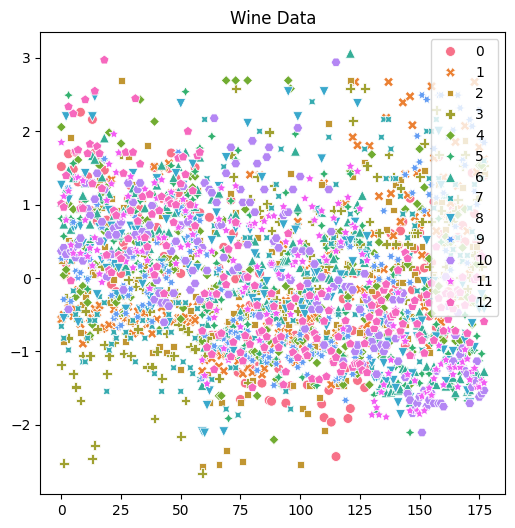

In [737]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X,s=50)
plt.title('Wine Data')
plt.show()

# K-Means Clustering

In [738]:
from sklearn.cluster import KMeans

In [739]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++', max_iter=300 ,
                  n_init =10 , random_state =42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

wcss

[2314.000000000001,
 1654.7713548974607,
 1265.9049355818315,
 1166.492150852535,
 1100.2967122196223,
 1036.4426996793559,
 989.6265883877971,
 948.4162905673692,
 905.2511209786287,
 875.0182268779865]

**Finding optimum number of clusters using Elbow Method**

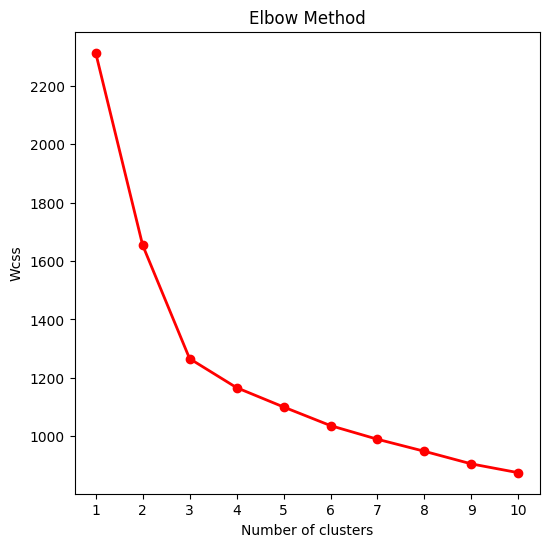

In [740]:
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel("Wcss")
plt.xticks(np.arange(1,11,1))
plt.show()

**By Elbow method the optimum number of clusters are 3 **

In [741]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++', max_iter=300 ,
 n_init =10 , random_state =42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [742]:
wine1=wine.copy()
wine1['cluster']=cluster_labels
wine1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


In [743]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [744]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.88122505,  0.19403083,  0.53777086, -0.06103856,
        -0.97933029, -1.21524764,  0.72606354, -0.79087061,  0.94339602,
        -1.17051157, -1.29241163, -0.40708796],
       [-0.92607185, -0.40243396, -0.49606186,  0.17655379, -0.52262273,
        -0.07598265,  0.02081257, -0.03353357,  0.05239714, -0.91616034,
         0.46115869,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30297211,  0.36045885, -0.62745662,  0.59812007,
         0.88523736,  0.97781956, -0.56208965,  0.59562237,  0.18447137,
         0.47936734,  0.77924711,  1.12518529]])

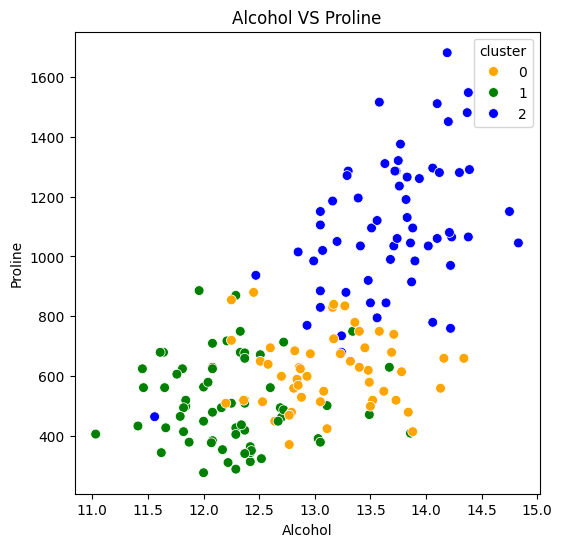

In [745]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=wine1,x='Alcohol',y='Proline',hue='cluster',palette=['orange','green','blue'],s=50)
plt.title('Alcohol VS Proline')
plt.show()

## Agglomerative Clustering

In [746]:
from scipy.cluster.hierarchy import dendrogram, linkage

**Finding optimum number of clusters using Dendrogram**

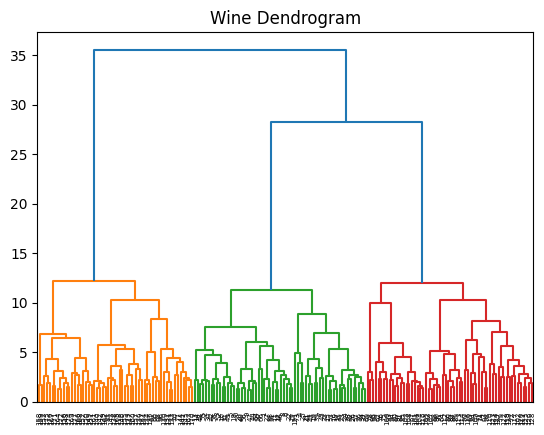

In [747]:
mergings=linkage(X,method='ward')
dendrogram(mergings)
plt.title('Wine Dendrogram')
plt.show()

# *`By Dendrogram method, the optimum number of clusters are 3 `*

In [748]:
from sklearn.cluster import AgglomerativeClustering
agg_hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_agg_hc=agg_hc.fit_predict(X)
y_agg_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [749]:
wine1['cluster_agglo']=y_agg_hc
wine1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster,cluster_agglo
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,2


In [750]:
wine1.shape

(178, 15)

In [751]:
wine1['cluster'].value_counts()

cluster
1    65
2    62
0    51
Name: count, dtype: int64

In [752]:
wine1['cluster_agglo'].value_counts()

cluster_agglo
2    62
1    60
0    56
Name: count, dtype: int64

# SILHOUETTE SCORES

In [753]:
from sklearn.metrics import silhouette_score
Kmeans_silh_scores=[]
for k in range (2,11):
  kmeans1=KMeans(n_clusters= k,random_state=42,n_init=10)
  kmeans_labels1=kmeans1.fit_predict(X)
  silh_avg=silhouette_score(X,kmeans_labels1)
  Kmeans_silh_scores.append(silh_avg)
for k,score in enumerate(Kmeans_silh_scores, start=2):
 print(f'NUMBER OF CLUSTERS = {k} and Silhouette Score = {score}')

NUMBER OF CLUSTERS = 2 and Silhouette Score = 0.2683377345519036
NUMBER OF CLUSTERS = 3 and Silhouette Score = 0.28550310855094574
NUMBER OF CLUSTERS = 4 and Silhouette Score = 0.25239307840514164
NUMBER OF CLUSTERS = 5 and Silhouette Score = 0.2031502693696948
NUMBER OF CLUSTERS = 6 and Silhouette Score = 0.18575652387885827
NUMBER OF CLUSTERS = 7 and Silhouette Score = 0.1886972554133238
NUMBER OF CLUSTERS = 8 and Silhouette Score = 0.14105972659046093
NUMBER OF CLUSTERS = 9 and Silhouette Score = 0.13652293114546235
NUMBER OF CLUSTERS = 10 and Silhouette Score = 0.12851096218381342


# Principal Component Analysis(PCA)

In [754]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
x_pca.shape
x_pca.head()



,PCA1,PCA2
0,3.358011,-1.520821
1,2.229443,0.332889
2,2.539566,-1.038150
3,3.780555,-2.783620
4,1.016268,-0.956354


In [755]:
#Reducing the cluster centers using PCA
centers=pca.transform(kmeans.cluster_centers_)
# Reduced Center
centers

array([[-2.72568541, -1.13960056],
       [-0.04527395,  1.79173861],
       [ 2.28956069, -0.94102228]])

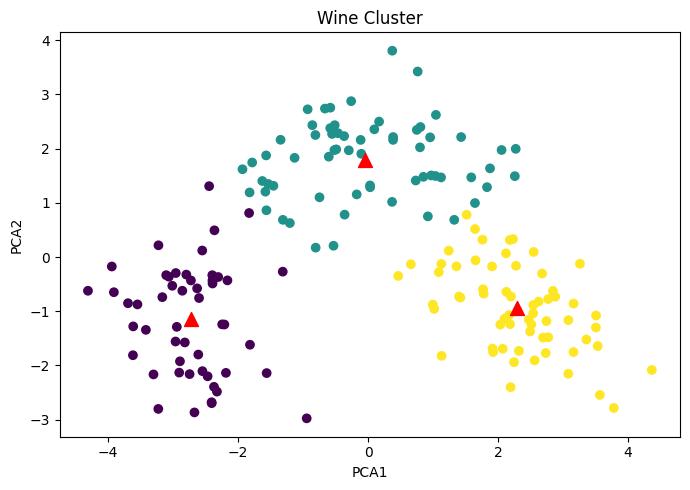

In [756]:

plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(x_pca['PCA1'],x_pca['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='^',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

# DBSCAN Clustering

In [757]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=15)
dbscan.fit(X)
db_clusters = dbscan.labels_
db_clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [759]:
wine1['db_clusters']=db_clusters
wine1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster,cluster_agglo,db_clusterso,db_clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,2,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,2,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,2,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,2,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,2,0,0
